In [1]:
import requests
#res = requests.get('https://tw.stock.yahoo.com/q/q?s=2330')
#print res.text

In [2]:
import requests
payload = {
'encodeURIComponent':'1',
'step':'1',
'firstin':'1',
'TYPEK':'sii',
'code':'',
'year':'104',
'season':'03'
}

res = requests.post('http://mops.twse.com.tw/mops/web/ajax_t163sb19', data=payload)
#print res.text



In [3]:
import requests
payload = {
'encodeURIComponent':'1',
'step':'1',
'firstin':'1',
'TYPEK':'sii',
'code':'',
'year':'104',
'season':'03'
}

res = requests.post('http://mops.twse.com.tw/mops/web/ajax_t163sb19', data=payload)
res.encoding = 'utf-8'
#print res.text



In [4]:
from bs4 import BeautifulSoup 
html_sample = ''' 
<html> 
 <body> 
 <h1 id="title">Hello World</h1> 
 <a href="#" class="link">This is link1</a> 
 <a href="# link2" class="link">This is link2</a> 
 </body> 
 </html>'''

soup = BeautifulSoup(html_sample, 'html.parser')
print soup.text




Hello World
This is link1
This is link2




In [5]:
soup = BeautifulSoup(html_sample, 'html.parser') 
alink = soup.select('a') 
print alink

[<a class="link" href="#">This is link1</a>, <a class="link" href="# link2">This is link2</a>]


In [6]:
alink = soup.select('#title') 
print alink

[<h1 id="title">Hello World</h1>]


In [7]:
soup = BeautifulSoup(html_sample, 'html.parser') 
for link in soup.select('.link'): 
    print link


<a class="link" href="#">This is link1</a>
<a class="link" href="# link2">This is link2</a>


In [8]:
https://www.cmoney.tw/screeners/
    http://mops.twse.com.tw/mops/web/t163sb19
        http://www.twse.com.tw/ch/listed/listing_profile_inquiry.php
    http://www.twse.com.tw/ch/listed/listing_profile_inquiry.php
        

SyntaxError: invalid syntax (<ipython-input-8-acd0d4aeb1fd>, line 1)

In [9]:
alinks = soup.select('a') 
for link in alinks: 
    print link['href']


#
# link2


In [10]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://tw.stock.yahoo.com/q/q?s=2330', 'html.parser')
soup = bs(res.text)
print soup.select('b')
print soup.select('b')[0].text

[<b>158.5</b>]
158.5


C:\Anaconda2\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [11]:
table =  soup.select('table + table table')[0]
tr = table.select('tr')[1]
for td in tr.select('td'):
    print td.text

2330台積電加到投資組合
12:08
158.5
158.5
159.0
△0.5
                
9,899
158.0
158.0
159.0
157.0

成交明細技術　新聞基本　籌碼個股健診


In [12]:
table =  soup.select('table + table table')[0]
tr = table.select('tr')[1]
for td in tr.select('td'):
    print td.text.strip()

2330台積電加到投資組合
12:08
158.5
158.5
159.0
△0.5
9,899
158.0
158.0
159.0
157.0
成交明細技術　新聞基本　籌碼個股健診


In [13]:
name = []
val  = []
table =  soup.select('table + table table')[0]
tr = table.select('tr')[0]
for th in tr.select('th'):
    name.append(th.text.strip())
    
tr = table.select('tr')[1]
for td in tr.select('td'):
    val.append(td.text.strip())


In [14]:
dic = {}
for n,v in zip(name, val):
    dic[n] = v

for ele in dic:
    print ele, dic[ele]

張數 9,899
開盤 158.0
個股資料 成交明細技術　新聞基本　籌碼個股健診
最低 157.0
昨收 158.0
賣出 159.0
買進 158.5
成交 158.5
時間 12:08
漲跌 △0.5
最高 159.0
股票代號 2330台積電加到投資組合


In [15]:
import pandas as pd
?pd.read_html

In [16]:
table = """
<table> 
    <thead> 
        <tr> 
        <th>Month</th>  
        <th>Savings</th> 
        </tr> 
    </thead> 
    <tbody> 
        <tr> <td>January</td> <td>$100</td></tr> 
        <tr> <td>February</td> <td>$80</td></tr> 
    </tbody> 
    <tfoot> 
        <tr> <td>Sum</td> <td>$180</td> </tr> 
    </tfoot> 
</table>
"""

import pandas as pd
df = pd.read_html(table)
df
df[0]



,Month,Savings
0,January,$100
1,February,$80
2,Sum,$180


In [17]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://tw.stock.yahoo.com/q/q?s=2330', 'html.parser')
soup = bs(res.text)

In [18]:
import pandas as pd
table =  soup.select('table + table table')[0]
df = pd.read_html(table.prettify('utf-8'), encoding= 'utf-8', header=0)


In [19]:
df[0]

,股票 代號,時間,成交,買進,賣出,漲跌,張數,昨收,開盤,最高,最低,個股資料
0,2330台積電 加到投資組合,12:08,158.5,158.5,159,△0.5,9965,158,158,159,157,成交明細 技術 新聞 基本 籌碼 個股健診
1,凱基證券下單,買 賣 張 零股交易,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
print df[0]['成交'.decode('utf-8')][0]

158.5


In [21]:
import requests
from bs4 import BeautifulSoup as bs
payload = {
'encodeURIComponent':'1',
'step':'1',
'firstin':'1',
'TYPEK':'sii',
'code':'',
'year':'104',
'season':'03'
}

res = requests.post('http://mops.twse.com.tw/mops/web/ajax_t163sb19', data=payload)
res.encoding= 'utf-8'
soup = bs(res.text)

In [22]:
import pandas as pd
dfs = pd.read_html(soup.prettify('utf-8'), encoding= 'utf-8', header=0)
dfall = []
for df in dfs:
    dfall.append(df[df['公司代號'.decode('utf-8')].str.match('^[0-9]+')])

In [23]:
stockdf = pd.concat(dfall, ignore_index=True)


In [24]:
#stockdf

In [25]:
#stockdf[stockdf['營業收入'.decode('utf-8')]==stockdf['營業收入'.decode('utf-8')].max()]

In [26]:
#stockdf.sort_values( by= '營業收入'.decode('utf-8'), ascending=False).head()

In [15]:
df1 = stockdf.groupby(['產業別'.decode('utf-8')], sort=False)['營業收入'.decode('utf-8')].max()
print df1

產業別
水泥工業          69118302
食品工業         320635395
塑膠工業         250678904
紡織纖維         160880353
電機機械          71697873
電器電纜         111900156
玻璃陶瓷          30332940
造紙工業          47165849
鋼鐵工業         222060055
橡膠工業          89243212
汽車工業         119012461
建材營造          21313146
航運業          109874296
觀光事業          16295035
金融保險業        348579020
貿易百貨         153065676
其他           198449597
化學工業          30423078
生技醫療業         11138402
油電燃氣業        479217566
半導體業         639978805
電腦及週邊設備業     801729003
光電業          282669377
通信網路業        169571048
電子零組件業       147843416
電子通路業        372935787
資訊服務業         11566283
其他電子業       3052432520
Name: 營業收入, dtype: float64


In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


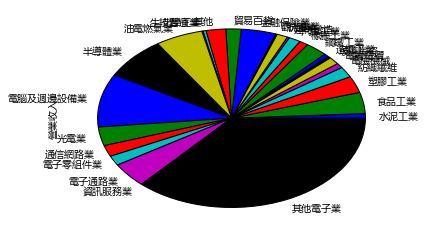

In [17]:
df1.plot.pie()

In [6]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd


def getEPS(year, season):
    dfall = []
    payload = {
    'encodeURIComponent':'1',
    'step':'1',
    'firstin':'1',
    'TYPEK':'sii',
    'code':'',
    'year':year,
    'season':season
    }

    res = requests.post('http://mops.twse.com.tw/mops/web/ajax_t163sb19', data=payload)
    res.encoding= 'utf-8'
    soup = bs(res.text)
    dfs = pd.read_html(soup.prettify('utf-8'), encoding= 'utf-8', header=0)
    for df in dfs:
        dfall.append(df[df['公司代號'.decode('utf-8')].str.match('^[0-9]+')])
    return dfall

In [7]:
dftotal = []
seasons = ['01','02','03','04']

for year in range(102,105):
    for season in seasons:       
        dftotal.extend(getEPS(year, season))

In [10]:
stockdf = pd.concat(dftotal, ignore_index=True)
len(stockdf)

In [13]:
len(stockdf)

9825

In [14]:
stockdf.head()

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
0,1102,亞洲水泥股份有限公司,水泥工業,0.40,新台幣 10.0000元,13931550,339801,1.25004e+06,1371559
1,1101,台灣水泥股份有限公司,水泥工業,0.38,新台幣 10.0000元,24114047,2.02673e+06,314060,1999624
2,1104,環球水泥股份有限公司,水泥工業,0.30,新台幣 10.0000元,1248072,30247,156012,183441
3,1108,幸福水泥股份有限公司,水泥工業,0.17,新台幣 10.0000元,1203671,98223,-13612,63869
4,1103,嘉新水泥股份有限公司,水泥工業,0.13,新台幣 10.0000元,741189,-149811,183613,59637


In [20]:
stockdf[stockdf['公司代號'.decode('utf-8')] == '2330']

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
449,2330,台灣積體電路製造股份有限公司,半導體業,1.53,新台幣 10.0000元,132754996,4.4428e+07,1.31990e+06,39535543
1285,2330,台灣積體電路製造股份有限公司,半導體業,3.52,新台幣 10.0000元,288641316,1.02057e+08,3.7075e+06,91297046
2132,2330,台灣積體電路製造股份有限公司,半導體業,5.53,新台幣 10.0000元,451218350,1.61675e+08,3.43933e+06,143231798
2992,2330,台灣積體電路製造股份有限公司,半導體業,7.26,新台幣 10.0000元,597024197,2.09429e+08,6.05776e+06,188018937
3848,2330,台灣積體電路製造股份有限公司,半導體業,1.85,新台幣 10.0000元,148215172,5.25224e+07,779482,47845778
4706,2330,台灣積體電路製造股份有限公司,半導體業,4.15,新台幣 10.0000元,331235656,1.23236e+08,4.16368e+06,107505635
5566,2330,台灣積體電路製造股份有限公司,半導體業,7.09,新台幣 10.0000元,540285390,2.07668e+08,5.11289e+06,183810241
6434,2330,台灣積體電路製造股份有限公司,半導體業,10.18,新台幣 10.0000元,762806465,2.9589e+08,6.20725e+06,263780869
7301,2330,台灣積體電路製造股份有限公司,半導體業,3.05,新台幣 10.0000元,222034144,8.66261e+07,1.63286e+06,78983908
8178,2330,台灣積體電路製造股份有限公司,半導體業,6.11,新台幣 10.0000元,427473896,1.63695e+08,2.26955e+07,158396812


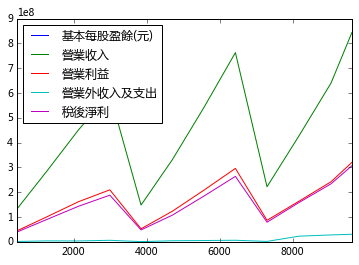

In [23]:
df2330 = stockdf[stockdf['公司代號'.decode('utf-8')] == '2330']
df2330.plot(kind='line', rot=0)


In [29]:
import sqlite3 as lite
with lite.connect('finance.sqlite') as db:
    stockdf.to_sql(name='enterprise_eps', index=False, con=db, if_exists='replace')

In [30]:
import sqlite3 as lite
with lite.connect('finance.sqlite') as db:
    df = pd.read_sql_query('SELECT count(1) FROM enterprise_eps;', db)
df 

,count(1)
0,9825


In [64]:
import requests
headers = {
'X-Requested-With':'XMLHttpRequest',
'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2623.87 Safari/537.36',
}
rs = requests.session()
res = rs.get('https://statementdog.com/analysis/analysis_ajax/2330/2011/1/2016/4/1', headers = headers)
json = res.text

In [71]:
jdf = pd.read_json(json)
jdf

,0.0,1.0,10.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,...,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0
data,"[0, success]","[2330 台積電, 半導體, 2016-03-25 158.0, 上市, 依客戶之訂單與其...",[],"[[0, 24.01], [1, 21.97], [2, 20.58], [3, 18.09...","[[0, 28.81], [1, 30.12], [2, 25.18], [3, 22.21...","[[0, 23.87], [1, 29.43], [2, 28.18], [3, 34.31...",[],[],[],[],...,"[[0, 155.04], [1, 175.04], [2, 181.41], [3, 23...","[[0, 2.35], [1, 2.38], [2, 2.32], [3, 2.42], [...","[[0, 1.78], [1, 1.88], [2, 2.16], [3, 2.29], [...","[[0, 0.26], [1, 0.24], [2, 0.22], [3, 0.22], [...","[[0, 0.14], [1, 0.14], [2, 0.14], [3, 0.14], [...","[[0, 49.03], [1, 46.02], [2, 42.04], [3, 44.74...","[[0, 37.16], [1, 34.27], [2, 29.67], [3, 31.45...","[[0, 34.57], [1, 32.6], [2, 28.58], [3, 30.14]...","[[0, 4.97], [1, 4.71], [2, 4.03], [3, 4.21], [...","[[0, 6.12], [1, 6.1], [2, 5.2], [3, 5.12], [4,..."
label,Return,StockInfo,最新彼得林區評價,近四季ROA,近四季ROE,盈再率,15%股利折現,10%股利折現,5%股利折現,0%股利折現,...,營業現金對稅後淨利比,應收帳款周轉,存貨週轉,固定資產週轉,總資產週轉,毛利率,營業利益率,稅後淨利率,ROA,ROE


In [27]:
import requests
res = requests.get('http://justdata.yuanta.com.tw/z/zk/zkf/zkResult.asp?D=1&A=x@10,a@30&site=')
res.encoding= 'big5'
#print res.text

In [28]:
# -*- coding: utf-8 -*-
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import NoAlertPresentException
from bs4 import BeautifulSoup
import unittest, time, re

driver = webdriver.Firefox()
driver.implicitly_wait(30)
driver.get("http://justdata.yuanta.com.tw/z/zk/zk00-f.asp")

soup = BeautifulSoup(driver.page_source)
#print soup

driver.close()


BadStatusLine: ''

In [72]:

import requests
from bs4 import BeautifulSoup as bs
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36'
}
rs = requests.session()
r2 = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', headers = headers)
soup = bs(r2.text)

payload = {
    '__EVENTTARGET':'',
    '__EVENTARGUMENT':'',
    '__LASTFOCUS':'',
    'RadioButton_Normal':'RadioButton_Normal',
    'TextBox_Stkno':'2330',
    'CaptchaControl1':'E3QL8'
    'btnOK':'查詢'
}
for inp in soup.select('input[type==hidden]'):
    payload[inp['id']] = inp['value']

r3 = rs.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', data=payload, headers = headers)


# In[9]:

r4 = rs.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx?v=t', headers = headers)
print r4.text




<html xmlns="http://www.w3.org/1999/xhtml">
<head><title>

</title><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><link id="ssLayout" rel="stylesheet" type="text/css" href="./BSR_Style.css" /></head>
<body bottommargin="0" leftmargin="0" topmargin="0" rightmargin="0">
    <form method="post" action="bsContent.aspx?v=t" id="form1">
<div class="aspNetHidden">
<input type="hidden" name="__VIEWSTATE" id="__VIEWSTATE" value="/wEPDwUKLTgxNDI2MzM4MGRkOCeVH5iuNhKRRTu7K+3m5A==" />
</div>

        <span id="sp_HtmlCode"><html><head></head><body><table border=0 cellpadding=0 cellspacing=0><tr><td align =center>  <table border='0' cellpadding='0' cellspacing='0' width='600px'>     <tr><td align='center'>       <table cellpadding='2' cellspacing='0' border='1' bordercolordark='#FFFFFF' bordercolorlight='#363636' bgcolor='#FFFFFF' width='100%'> 
    <tr>  
     <td class='column_title'> 
          交易日期</td> 
       <td colspan='3' class='column_value' id='receive_date'> 
    

In [89]:
import requests
res = requests.get('http://www.cmoney.tw/notes/?aid=3')
from bs4 import BeautifulSoup as bbs
soup = bs(res.text)
for article in soup.select('.p-article'):
    print article.select('.article-date')[0].text,\
    article.select('h2')[0].text,\
    article.select('.author > a')[0].text,\
    article.select('.browsN > span')[0].text

2016-3-15 這 3 檔「隱藏版好股」1 個月漲 22%！看懂了，下個月的飆股，自然是 ____ 權證小哥 15366
2016-3-7 陸股波動大，用這「3 招」做陸股，你也能一日賺 20%！ 權證小哥 3438
2016-3-4 持股還沒漲嗎？原來只要靠「3大法人 + 這 1 招」讓你每次出手都在「起漲點」！ 權證小哥 8412
2016-3-1 2/18 浩鼎 (4174)「假突破」，原來這時候...應該要，下次再看到像這樣過熱一定先跑再說！ 權證小哥 6905
2016-2-26 原來用___方式做股票，讓你上班「不看盤」也能穩穩賺利息，甚至賺到大波段！ 權證小哥 6605
2016-2-18 只要看準這 6 點：當出現...黃金交叉時，就是抓住飆股「起漲」的好時機！ 權證小哥 6373
2016-2-16 原來只要看到 ___，就表示股價要反彈了！難怪這 3 條線，大家都 搶著學！ 權證小哥 7098
2016-2-3 股價上漲，權證一定漲嗎？那可不一定...玩權證，要知道的 10 個小撇步 ！(內附 3 檔危險清單) 權證小哥 2616
2016-2-3 市場上有一群「神秘大戶」，專門操作「金融股」...學會這招，明天就幫自己加薪 3000元！ 權證小哥 14255
2016-2-2 權證的高槓桿 是它迷人之處，但這 9 大指標不可不知！尤其是第 5 點... 權證小哥 4088


In [91]:
import pandas as pd
url = 'http://www.twse.com.tw/ch/trading/fund/BFI82U/BFI82U.php?report1=day&input_date={}&mSubmit=%ACd%B8%D'
df = pd.read_html(url.format('105%2F03%2F24'))

In [97]:
df2 = df[7][1:]
df2.columns = df2.iloc[0]
df3 = df2.reindex(df2.index.drop(1))
df3['datetime'] = '2016-03-24'

In [107]:
df3

1,單位名稱,買進金額,賣出金額,買賣差額,datetime
2,自營商(自行買賣),839153813,864902760,-25748947,2016-03-24
3,自營商(避險),4653030687,5276206984,-623176297,2016-03-24
4,投信,551636160,1170498622,-618862462,2016-03-24
5,外資及陸資,23173717773,20769387128,2404330645,2016-03-24
6,合計,29217538433,28080995494,1136542939,2016-03-24


In [116]:
from datetime import datetime, timedelta
dt = datetime.today()
for i in xrange(1,10):
    print (dt - timedelta(days = i)).strftime('%Y-%m-%d')

2016-03-27
2016-03-26
2016-03-25
2016-03-24
2016-03-23
2016-03-22
2016-03-21
2016-03-20
2016-03-19
